## Checking the backward phase

In [1]:
import numpy as np
import sempler
import sempler.generators
import sempler.utils
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os

import causalicp as icp
from causalicp.test.test_vs_r import process_accepted_sets, process_confints, process_pvalues

[None, {2: (2.3561815391683787, 1.458218254987636)}, {4: (2.295173275271592, 1.7758536035863404)}]


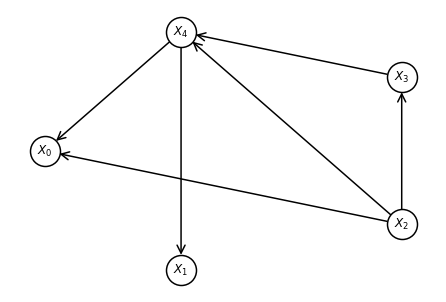

In [2]:
i = 175
path = 'causalicp/test/test_cases/case_%d' % i
XX = np.load(path + '.npy')
with open(path + '.pickle', 'rb') as f:
    (scm, interventions, data) = pickle.load(f)
assert (data == XX).all()
print(interventions)
sempler.utils.plot_graph(scm.W)

In [3]:
# Load R's accepted sets
path = 'causalicp/test/test_cases/icp_result_%d_accepted.csv' % i
df = pd.read_csv(path)
print(df)
true_accepted_sets = process_accepted_sets(df)
true_accepted_sets

   Unnamed: 0  V1  V2  V3  V4
0           1   0   1   0   1
1           2   1   1   0   1
2           3   0   1   1   1
3           4   1   1   1   1


{(1, 2, 3, 4), (1, 2, 4), (2, 3, 4), (2, 4)}

In [4]:
# Load R's confidence intervals
path = 'causalicp/test/test_cases/icp_result_%d_confints.csv' % i
df = pd.read_csv(path)
print(df)
true_confints = process_confints(df)
true_confints

   Unnamed: 0        V3        V4        V5        V6
0           1  0.038450  0.672279  0.081355 -0.749033
1           2 -0.092536  0.511710 -0.085890 -0.905029


array([[        nan, -0.09253612,  0.51170984, -0.08588979, -0.90502916],
       [        nan,  0.03844993,  0.67227906,  0.0813549 , -0.74903265]])

In [5]:
# Load R's p-values
path = 'causalicp/test/test_cases/icp_result_%d_pvals.csv' % i
df = pd.read_csv(path)
print(df)
true_pvalues = process_pvalues(df)
true_pvalues

   Unnamed: 0             x
0           1  3.279868e-03
1           2  2.523576e-19
2           3  3.279868e-03
3           4  2.553397e-16


{0: nan,
 1: 0.0032798684475018,
 2: 2.52357551383506e-19,
 3: 0.0032798684475018,
 4: 2.55339733849368e-16}

### Test ICP

In [6]:
%%time
target = 0
result = icp.fit(XX, target, alpha=0.001, selection=None, verbose=True)

Tested sets and their p-values:


KeyError: 'orange'

In [7]:
accepted_sets = set(tuple(s) for s in result.accepted)
accepted_sets == true_accepted_sets

NameError: name 'result' is not defined

In [ ]:
accepted_sets - true_accepted_sets

In [ ]:
true_accepted_sets - accepted_sets

In [ ]:
result.conf_intervals

In [ ]:
true_pvalues

In [ ]:
result.p_values

In [ ]:
np.all([np.isclose(p1, p2, equal_nan=True) for (p1, p2) in zip(true_pvalues.values(), result.p_values.values())])

### Test the GaussianData class

In [ ]:
raise Exception("Halt")

In [ ]:
from causalicp import GaussianData

In [ ]:
data = GaussianData(XX)
scm.W, scm.means

#### Not the same to center data and to add intercept column

In [ ]:
y = 2
S = {1,4}

In [ ]:
data = GaussianData(XX, method = 'raw')

In [ ]:
%%time
data.regress_pooled(y, S)

In [ ]:
data = GaussianData(XX, method = 'scatter')

In [ ]:
%%time
data.regress_pooled(y, S)

In [ ]:
0.00016855535884509765 * 4